In [1]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("C:\\Users\\PC\\Desktop\\Dataset\\Face_Mask\\00000_Mask.jpg")

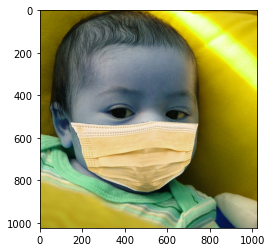

In [3]:
plt.imshow(img_array)

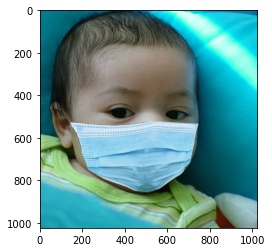

In [4]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [5]:
print(img_array)

[[[148 135   3]
  [149 136   4]
  [148 134   4]
  ...
  [148 115   0]
  [150 117   0]
  [149 116   0]]

 [[143 130   0]
  [147 134   2]
  [149 135   5]
  ...
  [149 116   0]
  [150 117   0]
  [149 116   0]]

 [[142 127   0]
  [146 131   0]
  [149 133   3]
  ...
  [151 116   0]
  [149 116   0]
  [147 114   0]]

 ...

 [[168 150  19]
  [166 148  17]
  [164 146  15]
  ...
  [158 153 128]
  [163 157 134]
  [165 160 135]]

 [[168 149  16]
  [168 149  16]
  [166 147  14]
  ...
  [162 158 130]
  [162 157 132]
  [162 158 130]]

 [[167 148  15]
  [168 149  16]
  [167 148  15]
  ...
  [164 160 132]
  [164 160 132]
  [162 158 130]]]


In [6]:
img_array.shape

(1024, 1024, 3)

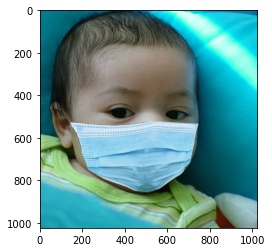

In [7]:
Datadirectory = 'C:\\Users\\PC\\Desktop\\Dataset\\' ## training dataset
Classes = ["Face_Mask","No_Mask"] ## List of classess
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        ##back to rgb = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break  

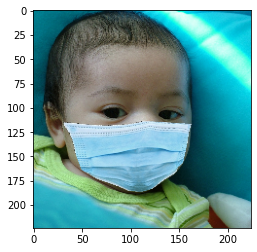

In [8]:
img_size = 224 ## Imagenet = 224 * 224

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

# Reading the images and converting all to array

In [9]:
training_Data = [] ##data

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category) ##0, 1  ##label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_Data()

In [11]:
print(len(training_Data))

1950


In [12]:
import random

random.shuffle(training_Data)

In [13]:
x = []  ## data/feature
y = []  ## label

for features,label in training_Data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)   
    

In [14]:
x.shape #(images,l,b,RGB)

(1950, 224, 224, 3)

In [ ]:
#normalize the data
x= x/255.0; #we are normalizing it #Since, max. value of grey = 255.0 otherwise we can use sckitlearn library

In [ ]:
y[0]  #face_mask

In [ ]:
y[1000]  #no_mask

In [ ]:
Y = np.array(y)  # Converting list into numpy array

# Storing all the above data into  pickle

In [39]:
import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [21]:
# Command to execute/load the values stored above
#pickle_in = open("x.pickle", "rb")
#x = pickle.load(pickle_in)

#pickle_in = open("y.pickle", "rb")
#y = pickle.load(pickle_in ) 

# deep learning model for training - Transfer Learning


In [40]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
model = tf.keras.applications.mobilenet.MobileNet() #pre - trained model

In [42]:
model

In [43]:
import pandas as pd

In [44]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

# transfer learning - Tuning , weights will start from last check point

In [45]:
base_input = model.layers[0].input

In [46]:
base_output = model.layers[-4].output

In [47]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) #0 , 1
final_output = layers.Activation('sigmoid')(final_output)

In [48]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [49]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

# Setting for binary classification(Face_Mask/Without_Mask)

In [50]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [51]:
x.shape

(1950, 224, 224, 3)

In [52]:
y=np.array([y])

In [53]:
y=y.reshape(-1,1)

In [54]:
y.shape

(1950, 1)

In [ ]:
new_model.fit(x,y, epochs = 1,validation_split = 0.1)        

In [ ]:
new_model.save('my_model3.h5')    

In [ ]:
new_model = tf.keras.models.load_model('C:\\Users\\PC\\Desktop\\CoviTech - Dataset\\my_model3.h5') 

# Checking the network for predictions

In [ ]:
frame = cv2.imread('00002_Mask.jpg')

In [ ]:
frame = cv2.imread("C:\\Users\\PC\\Desktop\\CoviTech - Dataset\\Face_Mask\\00016_Mask.jpg")

In [ ]:
print(frame)

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis=0) #need fourth dimension
final_image = final_image/255.0

In [45]:
## final_image = cv2.resize(frame,(22,224))\
## final_image = np.expand_dims(final_image,axis=0) #need fourth dimension
## final_image = final_image/255.0

In [ ]:
final_image.shape

In [47]:
#final_image=final_image.reshape(-1,1)

In [ ]:
new_model.predict(final_image)

In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
Predictions

# Checking the network for predictions

In [ ]:
frame = cv2.imread('C:\\Users\\PC\\Desktop\\CoviTech - Dataset\\Face_mask\\sad.jpg')

In [ ]:
frame.shape

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
faceCasecade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

In [ ]:
faces=faceCasecade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess=faceCasecade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex + ew]

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvtColor(roi_color,cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis=0) #need fourth dimension
final_image = final_image/255.0

In [ ]:
Predictions = new_model.predict(final_image)

In [ ]:
Predictions

# Real Time Demo
# FACE MASK DETECTION


In [63]:
pip install opencv-python

In [64]:
pip install opencv-contrib-python

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\PC\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'

  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)

Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: itsdangerous>=0.24 in c:\users\pc\anaconda3\lib\site-packages (from Flask>=1.1.2->deepface) (1.1.0)



In [ ]:
import cv2
from deepface import DeepFace
path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# Setting the rectangular background to white
rectangle_bgr = (255,255,255)

# make a black image
img = np.zeros((500,500))

# set some text
text = 'Some text in a box!'

# get the width and the height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness = 1)

cap = cv2.VideoCapture(1)

# check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    
#eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades.eye.xml')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_frontalface_default.xml')
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

# print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1 ,4)
for x,y,w,h in faces:
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = frame[y: y + h, x: x + w]
    cv2.rectangle(frame, (x,y), (x + w, y + h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print('Face not detected')
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey + eh, ex: ex + ew]

final_image = cv2.resize(face_roi, (224,224))  
final_image = np.expand_dims(final_image, axis = 0) # need 4th dimension
final_image = final_image/255.0

font = cv2.Font_Hershey_Simplex

Predictions = new_model.predict(final_image)

font_scale = 1.5
font = cv2.Font_Hershey_Plain

if (Predictions>0):
    status = 'No Mask'
    
    x1,w1,y1,h1 = 0,0,175,75
    # Draw black color rectangle
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.Font_Hershey_Simplex, 0.7, (0,0,255), 2)
    cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
    cv2.rectangle(frame, x, y, (x + w, y + h), (0,0,255))
else:
    status = "Face Mask"
    
    x1,w1,y1,h1 = 0,0,175,75
     # Draw black background rectangle
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
     # Add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.Font_Hershey_Simplex, 0.7, (0,255,0), 0)
    cv2.putText(frame, status, (100, 150), font, 3, (0,255,0), 2, cv2.LINE_4)
    cv2.rectangle(frame, x, y, (x + w, y + h), (0,255,0))

    
cv2.imshow('Face Mask Detection', frame) 

if cv2.waitKey(2) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

# adding some beeps

In [ ]:
import winsound
frequency =2500 # set frequency to 2500 Hz
duration = 1000 # set duration to 1000 ms == 1 second

import cv2
from deepface import DeepFace
path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# Setting the rectangular background to white
rectangle_bgr = (255,255,255)

# make a black image
img = np.zeros((500,500))

# set some text
text = 'Some text in a box!'

# get the width and the height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness = 1)

cap = cv2.VideoCapture(1)

# check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    
#eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades.eye.xml')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_frontalface_default.xml')
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

# print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1 ,1 ,4)
for x,y,w,h in faces:
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = frame[y: y + h, x: x + w]
    cv2.rectangle(frame, (x,y), (x + w, y + h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print('Face not detected')
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey + eh, ex: ex + ew]

final_image = cv2.resize(face_roi, (224,224))  
final_image = np.expand_dims(final_image, axis = 0) # need 4th dimension
final_image = final_image/255.0
font = cv2.Font_Hershey_Simplex
Predictions = new_model.predict(final_image)

font_scale = 1.5
font = cv2.Font_Hershey_Plain

if (Predictions>0):
    status = 'No Mask'
    
    x1,w1,y1,h1 = 0,0,175,75
    # Draw black color rectangle
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.Font_Hershey_Simplex, 0.7, (0,0,255), 2)
    cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
    cv2.rectangle(frame, x, y, (x + w, y + h), (0,0,255))
    winsound.Beep(frequency, duration)
else:
    status = "Face Mask"
    
    x1,w1,y1,h1 = 0,0,175,75
     # Draw black background rectangle
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
     # Add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.Font_Hershey_Simplex, 0.7, (0,255,0), 0)
    cv2.putText(frame, status, (100, 150), font, 3, (0,255,0), 2, cv2.LINE_4)
    cv2.rectangle(frame, x, y, (x + w, y + h), (0,255,0))

    # gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    # faces = faceCascade.detectMultiScale(gray,1.1 ,4)
    # Draw a rectangle around a face
    # for(x,y,w,h) in faces 
         # cv2.rectangle(frame, x, y, (x + w, y + h), (0,255,0),2)
    # use putText method for inserting text on video    
    
cv2.imshow('Face Mask Detection', frame) 

if cv2.waitKey(2) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()